<a href="https://colab.research.google.com/github/yohanaaritonang/predicting-employees-performance-with-apriori-algorithm/blob/main/Exploratory-Data-Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
#mengimpor file berupa csv
import io
%time employee = pd.read_csv("employee.csv", delimiter=',', index_col =0)

Wall time: 184 ms


In [3]:
employee.sample(5)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,performance_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
57243,Technology,region_13,Bachelor's,female,sourcing,1,37,Great,8,No,No,82,No
32639,Technology,region_22,Bachelor's,female,sourcing,1,27,NaN,1,No,Yes,89,Yes
21411,Technology,region_4,Bachelor's,female,sourcing,1,42,Great,3,No,No,79,No
21272,Sales & Marketing,region_15,Below Secondary,male,other,2,38,Low,8,No,No,49,No
76682,Sales & Marketing,region_15,Below Secondary,male,other,1,46,Low,16,No,No,51,No


In [4]:
employee.describe()

,no_of_trainings,age,length_of_service,avg_training_score
count,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.195282,34.803915,5.865512,63.386750
std,0.556788,7.660169,4.265094,13.371559
min,1.000000,20.000000,1.000000,39.000000
25%,1.000000,29.000000,3.000000,51.000000
50%,1.000000,33.000000,5.000000,60.000000
75%,1.000000,39.000000,7.000000,76.000000
max,10.000000,60.000000,37.000000,99.000000


In [5]:
#check missing value

round (employee.isnull().sum()/ len(employee) * 100, 4)
# employee.isna()

department             0.0000
region                 0.0000
education              4.3753
gender                 0.0000
recruitment_channel    0.0000
no_of_trainings        0.0000
age                    0.0000
performance_rating     7.5244
length_of_service      0.0000
KPIs_met >80%          0.0000
awards_won?            0.0000
avg_training_score     0.0000
is_promoted            0.0000
dtype: float64

## SEABORN

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

In [7]:
# standard import statement for seaborn
import seaborn as sns

In [8]:
employee.shape

(54808, 13)

In [9]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54808 entries, 65438 to 51526
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   department           54808 non-null  object
 1   region               54808 non-null  object
 2   education            52410 non-null  object
 3   gender               54808 non-null  object
 4   recruitment_channel  54808 non-null  object
 5   no_of_trainings      54808 non-null  int64 
 6   age                  54808 non-null  int64 
 7   performance_rating   50684 non-null  object
 8   length_of_service    54808 non-null  int64 
 9   KPIs_met >80%        54808 non-null  object
 10  awards_won?          54808 non-null  object
 11  avg_training_score   54808 non-null  int64 
 12  is_promoted          54808 non-null  object
dtypes: int64(4), object(9)
memory usage: 5.9+ MB


## Menganalisis Variabel secara Individual

In [10]:
numerical_vars = ['no_of_trainings', 'age', 
                 'length_of_service', 'avg_training_score']
categorical_vars = ['department', 'region', 'education', 'gender', 'recruitment_channel',
                   'performance_rating', 'KPIs_met >80%', 'awards_won?', 'is_promoted']

In [11]:
employee = employee[numerical_vars + categorical_vars]
employee.shape

(54808, 13)

## Memahami Variabel Utama

In [12]:
employee['performance_rating'].describe()

count     50684
unique        5
top       Great
freq      18618
Name: performance_rating, dtype: object

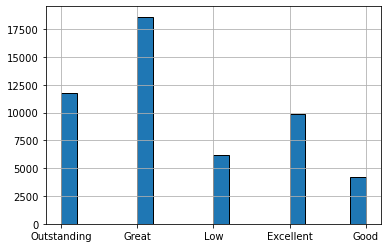

In [13]:
employee['performance_rating'].hist(edgecolor='black', bins=20);

In [14]:
print("Skewness: {:0.3f}".format(employee['length_of_service'].skew()))
print("Kurtosis: {:0.3f}".format(employee['length_of_service'].kurt()))

Skewness: 1.738
Kurtosis: 4.414


# Variabel Numerikal

In [15]:
employee[numerical_vars].describe()

,no_of_trainings,age,length_of_service,avg_training_score
count,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.195282,34.803915,5.865512,63.386750
std,0.556788,7.660169,4.265094,13.371559
min,1.000000,20.000000,1.000000,39.000000
25%,1.000000,29.000000,3.000000,51.000000
50%,1.000000,33.000000,5.000000,60.000000
75%,1.000000,39.000000,7.000000,76.000000
max,10.000000,60.000000,37.000000,99.000000


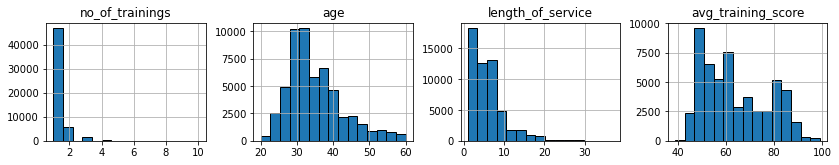

In [16]:
employee[numerical_vars].hist(edgecolor='black', bins=15, figsize=(14, 5), layout = (2,4));

In [17]:
employee['age_start_of_service'] = employee['age'] - employee['length_of_service']

In [18]:
employee['age_start_of_service']

employee_id
65438    27
65141    26
7513     27
2542     29
48945    43
         ..
3030     31
74592    31
13918    24
13614    27
51526    22
Name: age_start_of_service, Length: 54808, dtype: int64

In [19]:
numerical_vars.append('age_start_of_service')

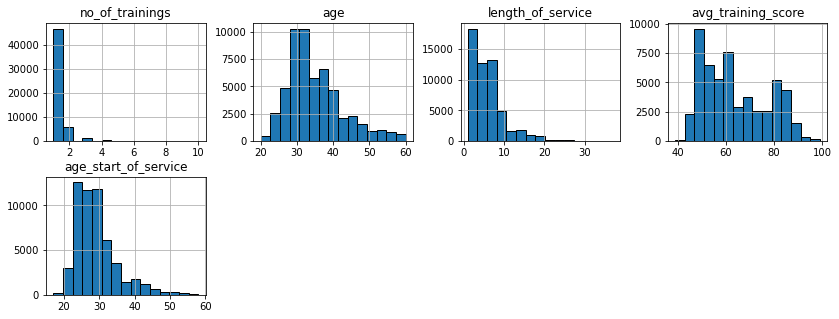

In [20]:
employee[numerical_vars].hist(edgecolor='black', bins=15, figsize=(14,5), layout = (2,4));

# Variabel Kategorikal

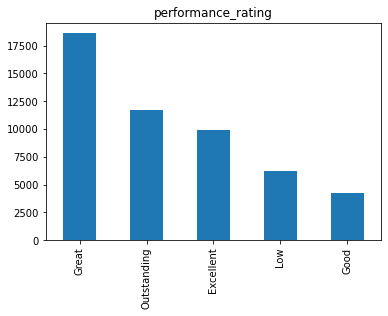

In [21]:
employee['performance_rating'].value_counts().plot(kind='bar', title='performance_rating');

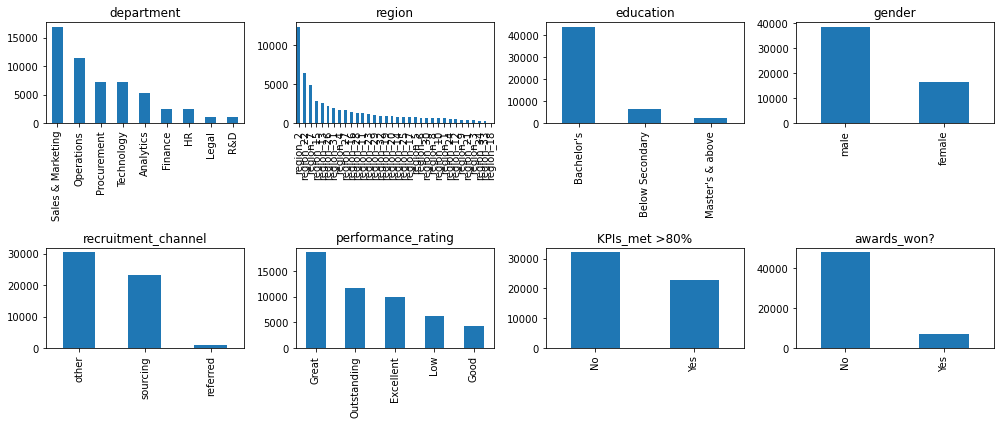

In [22]:
fig, ax = plt.subplots(2,4, figsize=(14,6))
for var, subplot in zip(categorical_vars, ax.flatten()):
    employee[var].value_counts().plot(kind='bar', ax=subplot, title=var)
    
    fig.tight_layout()

In [23]:
def identify_cat_above30(series):
    counts = series.value_counts()
    return list(counts[counts>=30].index)

In [24]:
levels_to_keep = employee[categorical_vars].apply(identify_cat_above30, axis=0)
levels_to_keep

department             [Sales & Marketing, Operations, Procurement, T...
region                 [region_2, region_22, region_7, region_15, reg...
education                [Bachelor's, Below Secondary, Master's & above]
gender                                                    [male, female]
recruitment_channel                          [other, sourcing, referred]
performance_rating            [Great, Outstanding, Excellent, Low, Good]
KPIs_met >80%                                                  [No, Yes]
awards_won?                                                    [No, Yes]
is_promoted                                                    [No, Yes]
dtype: object

In [25]:
for var in categorical_vars:
    employee = employee.loc[employee[var].isin(levels_to_keep[var])]

In [26]:
employee.shape

(48671, 14)

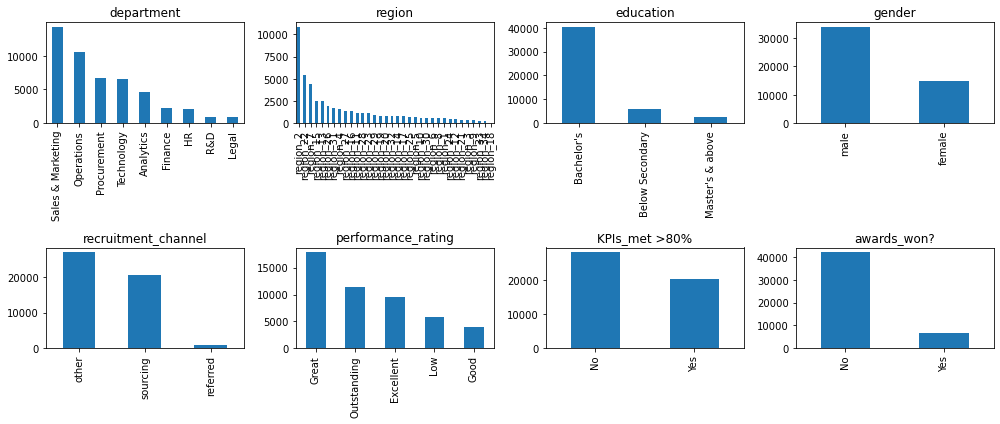

In [27]:
fig, ax = plt.subplots(2,4, figsize=(14,6))
for var, subplot in zip(categorical_vars, ax.flatten()):
    employee[var].value_counts().plot(kind='bar', ax=subplot, title=var)
    
    fig.tight_layout()

## Hubungan Antara Variabel dengan Scatter Plot

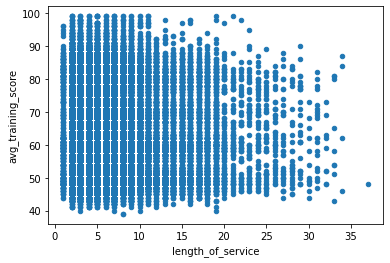

In [28]:
employee.plot.scatter(x='length_of_service', y='avg_training_score');

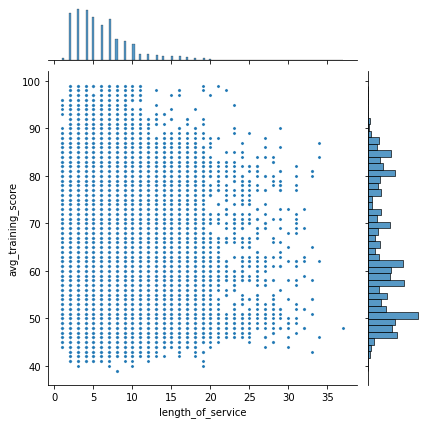

In [29]:
sns.jointplot(x='length_of_service', y='avg_training_score', data=employee, joint_kws={"s": 10});

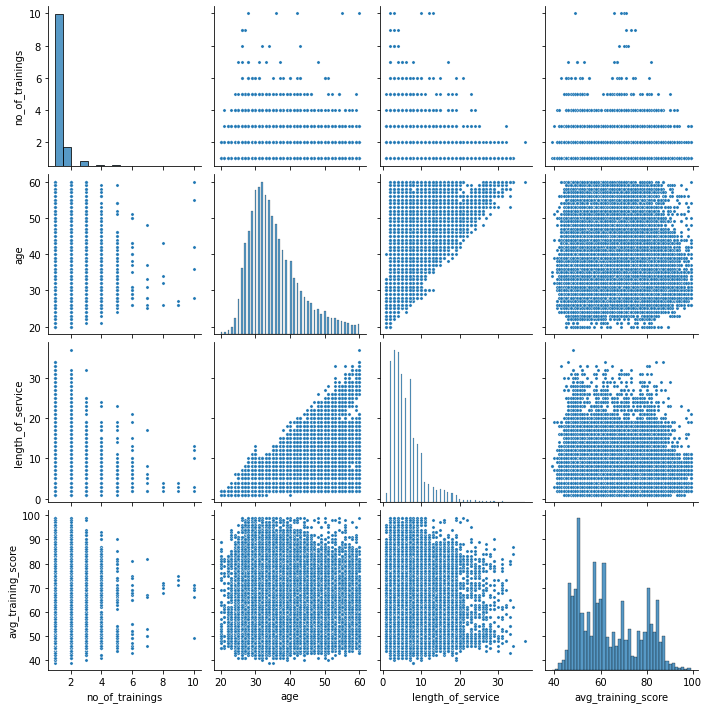

In [30]:
sns.pairplot(employee[numerical_vars[:4]], plot_kws={"s": 10});

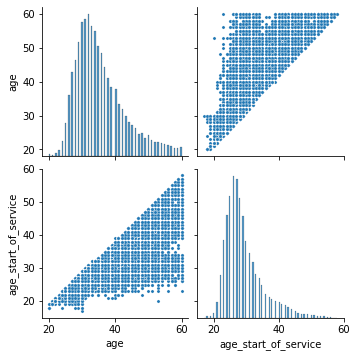

In [31]:
sns.pairplot(employee[['age']+numerical_vars[4:]], plot_kws={"s": 10});

In [32]:
employee[numerical_vars].corr()

,no_of_trainings,age,length_of_service,avg_training_score,age_start_of_service
no_of_trainings,1.000000,-0.066667,-0.046156,0.002221,-0.051994
age,-0.066667,1.000000,0.620356,-0.066245,0.830976
length_of_service,-0.046156,0.620356,1.000000,-0.047505,0.079177
avg_training_score,0.002221,-0.066245,-0.047505,1.000000,-0.050502
age_start_of_service,-0.051994,0.830976,0.079177,-0.050502,1.000000


In [33]:
employee[numerical_vars].corr()['age'].sort_values(ascending=False)

age                     1.000000
age_start_of_service    0.830976
length_of_service       0.620356
avg_training_score     -0.066245
no_of_trainings        -0.066667
Name: age, dtype: float64

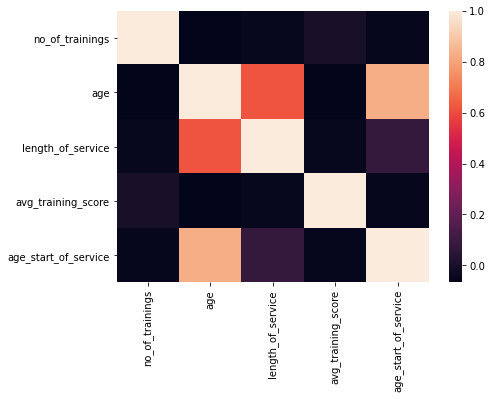

In [34]:
correlations = employee[numerical_vars].corr()
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(correlations, ax = ax);

## Hubungan Antara Variabel dengan Scatter Plot

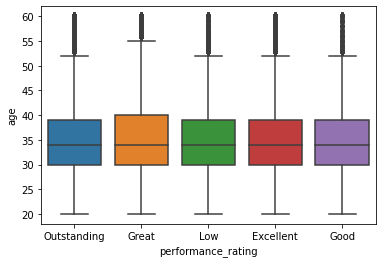

In [35]:
sns.boxplot(x='performance_rating', y='age', data=employee);

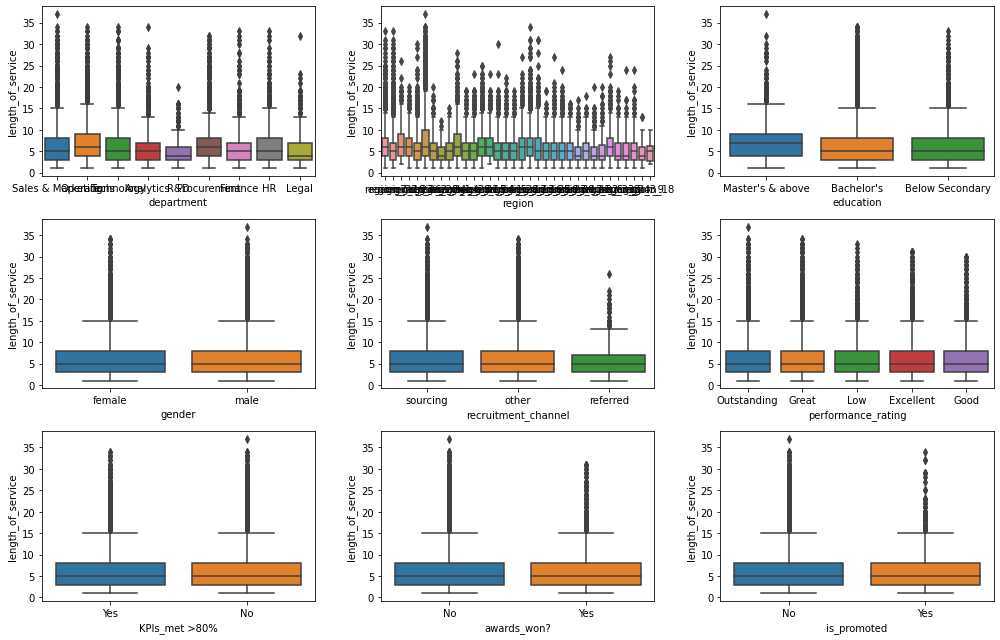

In [36]:
fig, ax = plt.subplots(3,3, figsize=(14,9))
for var, subplot in zip(categorical_vars, ax.flatten()):
    sns.boxplot(x=var, y='length_of_service', data=employee, ax=subplot)
    
    fig.tight_layout()

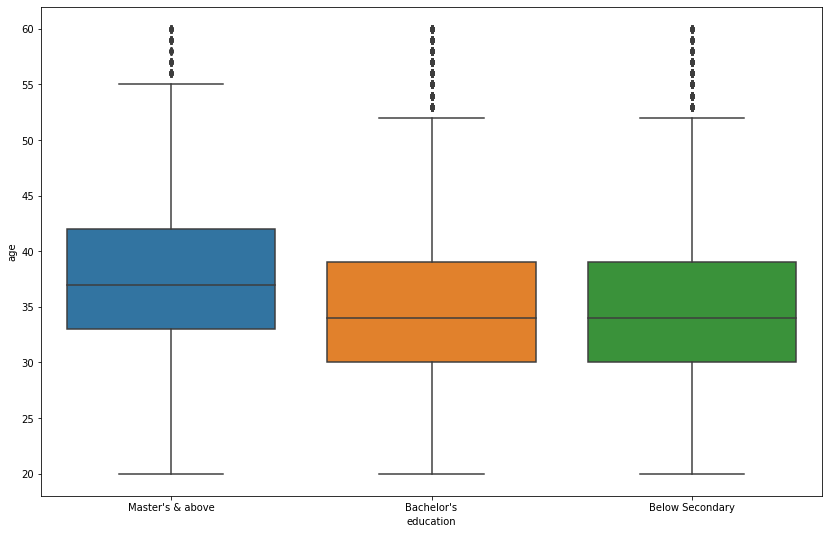

In [37]:
fig, ax = plt.subplots(figsize=(14,9))
sns.boxplot(x='education', y='age', data=employee,ax=ax);

In [38]:
sorted_nb = employee.groupby('education')['age'].median().sort_values().index.values

In [39]:
sorted_nb

array(["Bachelor's", 'Below Secondary', "Master's & above"], dtype=object)

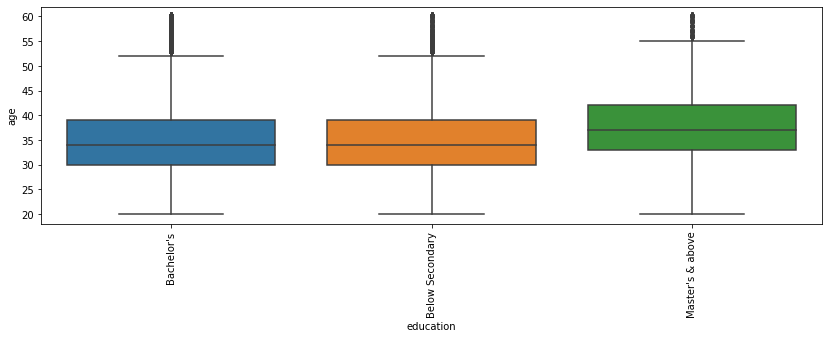

In [40]:
fig, ax = plt.subplots(figsize=(14,4))
sns.boxplot(x='education', y='age', data=employee, order=sorted_nb, ax=ax)
plt.xticks(rotation='vertical');

## Hubungan Antara Variabel dengan Complex Conditional Plots

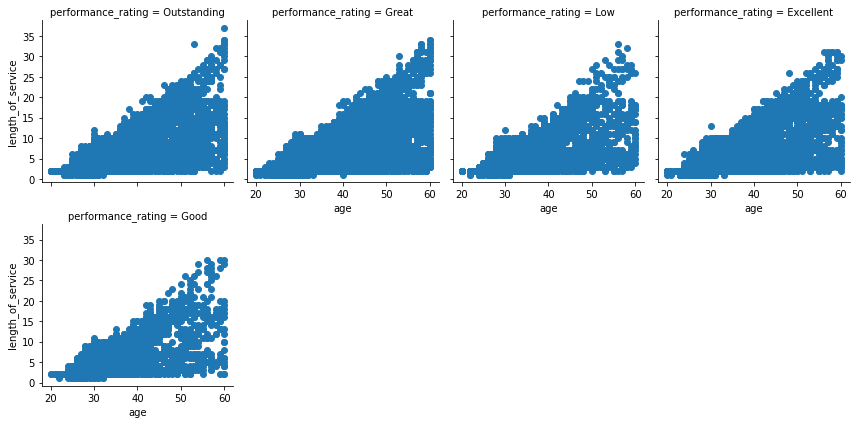

In [41]:
conditional_plot = sns.FacetGrid(employee, col="performance_rating", col_wrap=4)
conditional_plot.map(plt.scatter, "age", "length_of_service");

# Data Cleaning

In [42]:
employee = pd.read_csv("employee.csv")

In [43]:
#check missing value

#round (employee.isnull().sum()/ len(employee) * 100, 4)
employee.isna()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,performance_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,False,False,False,False,False,False,False,False,False,False,False,False,False,False
54804,False,False,False,False,False,False,False,False,False,False,False,False,False,False
54805,False,False,False,False,False,False,False,False,False,False,False,False,False,False
54806,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [44]:
# Agregasi data untuk mengetahui jumlah cell yang hilang dan pada lokasi atribut
employee.isna().sum()

employee_id               0
department                0
region                    0
education              2398
gender                    0
recruitment_channel       0
no_of_trainings           0
age                       0
performance_rating     4124
length_of_service         0
KPIs_met >80%             0
awards_won?               0
avg_training_score        0
is_promoted               0
dtype: int64

Terdapat missing value pada atribut education dan performance_rating

## Handling Missing data (Drop Missing Values)

In [45]:
employee

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,performance_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,female,sourcing,1,35,Outstanding,8,Yes,No,49,No
1,65141,Operations,region_22,Bachelor's,male,other,1,30,Outstanding,4,Yes,No,60,No
2,7513,Sales & Marketing,region_19,Bachelor's,male,sourcing,1,34,Great,7,No,No,50,No
3,2542,Sales & Marketing,region_23,Below Secondary,male,other,2,39,Low,10,No,No,50,No
4,48945,Technology,region_26,Bachelor's,male,other,1,45,Great,2,No,No,73,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,male,sourcing,1,48,Great,17,No,No,78,No
54804,74592,Operations,region_27,Master's & above,female,other,1,37,Good,6,No,No,56,No
54805,13918,Analytics,region_1,Master's & above,male,other,1,27,Outstanding,3,No,No,79,No
54806,13614,Sales & Marketing,region_9,NaN,male,sourcing,1,29,Low,2,No,No,45,No


In [46]:
# change data to dataframe
data_df = pd.DataFrame(employee)
print (data_df)

       employee_id         department     region         education  gender  \
0            65438  Sales & Marketing   region_7  Master's & above  female   
1            65141         Operations  region_22        Bachelor's    male   
2             7513  Sales & Marketing  region_19        Bachelor's    male   
3             2542  Sales & Marketing  region_23   Below Secondary    male   
4            48945         Technology  region_26        Bachelor's    male   
...            ...                ...        ...               ...     ...   
54803         3030         Technology  region_14        Bachelor's    male   
54804        74592         Operations  region_27  Master's & above  female   
54805        13918          Analytics   region_1  Master's & above    male   
54806        13614  Sales & Marketing   region_9               NaN    male   
54807        51526                 HR  region_22        Bachelor's    male   

      recruitment_channel  no_of_trainings  age performance_rat

In [47]:
print(employee.shape)

(54808, 14)


In [48]:
# drop missing value
employee_dropna = employee.dropna()
print(employee_dropna.shape)

(48671, 14)


In [49]:
print(employee_dropna)

       employee_id         department     region         education  gender  \
0            65438  Sales & Marketing   region_7  Master's & above  female   
1            65141         Operations  region_22        Bachelor's    male   
2             7513  Sales & Marketing  region_19        Bachelor's    male   
3             2542  Sales & Marketing  region_23   Below Secondary    male   
4            48945         Technology  region_26        Bachelor's    male   
...            ...                ...        ...               ...     ...   
54802         6915  Sales & Marketing  region_14        Bachelor's    male   
54803         3030         Technology  region_14        Bachelor's    male   
54804        74592         Operations  region_27  Master's & above  female   
54805        13918          Analytics   region_1  Master's & above    male   
54807        51526                 HR  region_22        Bachelor's    male   

      recruitment_channel  no_of_trainings  age performance_rat

In [50]:
#recheck missing value
round (employee_dropna.isnull().sum()/ len(employee_dropna) * 100, 4)

employee_id            0.0
department             0.0
region                 0.0
education              0.0
gender                 0.0
recruitment_channel    0.0
no_of_trainings        0.0
age                    0.0
performance_rating     0.0
length_of_service      0.0
KPIs_met >80%          0.0
awards_won?            0.0
avg_training_score     0.0
is_promoted            0.0
dtype: float64

In [51]:
employee[['education', 'performance_rating']].isnull().sum()

education             2398
performance_rating    4124
dtype: int64

In [52]:
employee_dropna[['education', 'performance_rating']].isnull().sum()

education             0
performance_rating    0
dtype: int64

Nothing missing value

# Data Reduction

In [53]:
employee = employee_dropna

In [54]:
employee

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,performance_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,female,sourcing,1,35,Outstanding,8,Yes,No,49,No
1,65141,Operations,region_22,Bachelor's,male,other,1,30,Outstanding,4,Yes,No,60,No
2,7513,Sales & Marketing,region_19,Bachelor's,male,sourcing,1,34,Great,7,No,No,50,No
3,2542,Sales & Marketing,region_23,Below Secondary,male,other,2,39,Low,10,No,No,50,No
4,48945,Technology,region_26,Bachelor's,male,other,1,45,Great,2,No,No,73,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54802,6915,Sales & Marketing,region_14,Bachelor's,male,other,2,31,Low,2,No,No,49,No
54803,3030,Technology,region_14,Bachelor's,male,sourcing,1,48,Great,17,No,No,78,No
54804,74592,Operations,region_27,Master's & above,female,other,1,37,Good,6,No,No,56,No
54805,13918,Analytics,region_1,Master's & above,male,other,1,27,Outstanding,3,No,No,79,No


In [55]:
# Drop irrelevant attributes
employee = employee.drop('department', axis=1)
employee = employee.drop('region', axis=1)
employee = employee.drop('gender', axis=1)
employee = employee.drop('recruitment_channel', axis=1)
employee = employee.drop('age', axis=1)

In [56]:
employee

,employee_id,education,no_of_trainings,performance_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Master's & above,1,Outstanding,8,Yes,No,49,No
1,65141,Bachelor's,1,Outstanding,4,Yes,No,60,No
2,7513,Bachelor's,1,Great,7,No,No,50,No
3,2542,Below Secondary,2,Low,10,No,No,50,No
4,48945,Bachelor's,1,Great,2,No,No,73,No
...,...,...,...,...,...,...,...,...,...
54802,6915,Bachelor's,2,Low,2,No,No,49,No
54803,3030,Bachelor's,1,Great,17,No,No,78,No
54804,74592,Master's & above,1,Good,6,No,No,56,No
54805,13918,Master's & above,1,Outstanding,3,No,No,79,No


## Implementing Apriori Algorithm

In [57]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

Dari data yang telah direduksi, terdapat 7 atribut atau kolom yang akan digunakan, yaitu:
1. education
2. no_of_trainings
3. length_of_service
4. KPIs_met>80%
5. awards_won
6. avg_training_score
7. performance rating

Dari ketujuh atribut tersebut, terdapat 3 variabel numerikal yaitu no_of_trainings, length_of_service, dan avg_training_score. Berdasarkan data yang ada variabel length_of_service dan avg_training_score akan dibagi ke dalam 4 bin.

In [58]:
#create bins for length_of_service
pd.qcut(employee['length_of_service'], q=4)

0          (5.0, 8.0]
1          (3.0, 5.0]
2          (5.0, 8.0]
3         (8.0, 37.0]
4        (0.999, 3.0]
             ...     
54802    (0.999, 3.0]
54803     (8.0, 37.0]
54804      (5.0, 8.0]
54805    (0.999, 3.0]
54807      (3.0, 5.0]
Name: length_of_service, Length: 48671, dtype: category
Categories (4, interval[float64]): [(0.999, 3.0] < (3.0, 5.0] < (5.0, 8.0] < (8.0, 37.0]]

In [59]:
#create length_of_service_range column
employee['length_of_service_range'] = pd.qcut(employee['length_of_service'], q=4, labels=['<=8', '>3 <=5', '>5 <=8', '>8'])

In [60]:
#show length_of_service_range column
employee['length_of_service_range']

0        >5 <=8
1        >3 <=5
2        >5 <=8
3            >8
4           <=8
          ...  
54802       <=8
54803        >8
54804    >5 <=8
54805       <=8
54807    >3 <=5
Name: length_of_service_range, Length: 48671, dtype: category
Categories (4, object): ['<=8' < '>3 <=5' < '>5 <=8' < '>8']

In [61]:
#create bins for avg_training_score
pd.qcut(employee['avg_training_score'], q=4)

0        (38.999, 51.0]
1          (51.0, 60.0]
2        (38.999, 51.0]
3        (38.999, 51.0]
4          (60.0, 76.0]
              ...      
54802    (38.999, 51.0]
54803      (76.0, 99.0]
54804      (51.0, 60.0]
54805      (76.0, 99.0]
54807    (38.999, 51.0]
Name: avg_training_score, Length: 48671, dtype: category
Categories (4, interval[float64]): [(38.999, 51.0] < (51.0, 60.0] < (60.0, 76.0] < (76.0, 99.0]]

In [62]:
#create avg_training_score_range column
employee['avg_training_score_range'] = pd.qcut(employee['avg_training_score'], q=4, labels=['<=51', '>51 <=60', '>60 <=76', '>76'])

In [63]:
#show avg_training_score_range column
employee['avg_training_score_range']

0            <=51
1        >51 <=60
2            <=51
3            <=51
4        >60 <=76
           ...   
54802        <=51
54803         >76
54804    >51 <=60
54805         >76
54807        <=51
Name: avg_training_score_range, Length: 48671, dtype: category
Categories (4, object): ['<=51' < '>51 <=60' < '>60 <=76' < '>76']

In [64]:
employee.head()

,employee_id,education,no_of_trainings,performance_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,length_of_service_range,avg_training_score_range
0,65438,Master's & above,1,Outstanding,8,Yes,No,49,No,>5 <=8,<=51
1,65141,Bachelor's,1,Outstanding,4,Yes,No,60,No,>3 <=5,>51 <=60
2,7513,Bachelor's,1,Great,7,No,No,50,No,>5 <=8,<=51
3,2542,Below Secondary,2,Low,10,No,No,50,No,>8,<=51
4,48945,Bachelor's,1,Great,2,No,No,73,No,<=8,>60 <=76


In [65]:
columns = ['performance_rating',
           'education',
           'no_of_trainings',
           'length_of_service_range',
           'KPIs_met >80%',
           'awards_won?',
           'avg_training_score_range']

not_used_columns = list(set(employee.columns.to_list()) - set(columns))

employee = pd.get_dummies(employee, columns=columns)

employee.drop(labels=not_used_columns, axis=1, inplace=True)

In [66]:
employee.head()

,performance_rating_Excellent,performance_rating_Good,performance_rating_Great,performance_rating_Low,performance_rating_Outstanding,education_Bachelor's,education_Below Secondary,education_Master's & above,no_of_trainings_1,no_of_trainings_2,...,length_of_service_range_>5 <=8,length_of_service_range_>8,KPIs_met >80%_No,KPIs_met >80%_Yes,awards_won?_No,awards_won?_Yes,avg_training_score_range_<=51,avg_training_score_range_>51 <=60,avg_training_score_range_>60 <=76,avg_training_score_range_>76
0,0,0,0,0,1,0,0,1,1,0,...,1,0,0,1,1,0,1,0,0,0
1,0,0,0,0,1,1,0,0,1,0,...,0,0,0,1,1,0,0,1,0,0
2,0,0,1,0,0,1,0,0,1,0,...,1,0,1,0,1,0,1,0,0,0
3,0,0,0,1,0,0,1,0,0,1,...,0,1,1,0,1,0,1,0,0,0
4,0,0,1,0,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0


Dalam penerapan algoritma apriori, berikut hyperparameter yang digunakan
1. minimum support yang digunakan 0.1
2. minimum confidence yang digunakan 0.6

In [67]:
#Apriori min support
min_support = 0.1

#Max lenght of apriori n-grams
max_len = 3

frequent_items = apriori(employee, use_colnames=True, 
                         min_support=min_support, max_len=max_len + 1)

rules = association_rules(frequent_items, metric='lift', min_threshold=1)

rules.head(50).sort_values(by='confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
49,(education_Below Secondary),(awards_won?_No),0.123256,0.866183,0.122886,0.996999,1.151026,0.016124,44.598183
11,(performance_rating_Great),(KPIs_met >80%_No),0.367118,0.579914,0.366009,0.996978,1.719182,0.153112,139.001751
9,(performance_rating_Great),(education_Bachelor's),0.367118,0.827372,0.362968,0.988695,1.194983,0.059225,15.269928
20,(performance_rating_Low),(awards_won?_No),0.120976,0.866183,0.118818,0.982167,1.133902,0.014031,7.503939
28,(performance_rating_Outstanding),(awards_won?_No),0.233527,0.866183,0.228781,0.979676,1.131027,0.026504,6.584253
12,(performance_rating_Great),(awards_won?_No),0.367118,0.866183,0.359167,0.978341,1.129485,0.041175,6.178397
16,(performance_rating_Low),(education_Below Secondary),0.120976,0.123256,0.117894,0.974524,7.906498,0.102983,34.415119
4,(performance_rating_Excellent),(KPIs_met >80%_Yes),0.195476,0.420086,0.189415,0.968993,2.306655,0.107298,18.702722
2,(performance_rating_Excellent),(no_of_trainings_1),0.195476,0.860738,0.187524,0.959323,1.114535,0.019271,3.423604
24,(performance_rating_Outstanding),(no_of_trainings_1),0.233527,0.860738,0.223809,0.958385,1.113445,0.022803,3.346400


Berdasarkan dataset, penerapan algoritma apriori menghasilkan 28 rules yang memenuhi minimum support dan minimum confidence yang didefinisikan.

In [68]:
rules.count()

antecedents           864
consequents           864
antecedent support    864
consequent support    864
support               864
confidence            864
lift                  864
leverage              864
conviction            864
dtype: int64

Berdasarkan kode di atas, dapat dilihat bahwa jumlah rulesnya sebanyak 864.

In [69]:
employee['performance_rating_Low'].value_counts()

0    42783
1     5888
Name: performance_rating_Low, dtype: int64

In [70]:
employee['performance_rating_Good'].value_counts()

0    44636
1     4035
Name: performance_rating_Good, dtype: int64

In [71]:
employee['performance_rating_Great'].value_counts()

0    30803
1    17868
Name: performance_rating_Great, dtype: int64

In [72]:
employee['performance_rating_Excellent'].value_counts()

0    39157
1     9514
Name: performance_rating_Excellent, dtype: int64

In [73]:
employee['performance_rating_Outstanding'].value_counts()

0    37305
1    11366
Name: performance_rating_Outstanding, dtype: int64

Dapat dilihat urutan performance rating berdasarkan jumlahnya sebagai berikut:
1. Good
2. Low
3. Excellent
4. Outstanding
5. Great

menampilkan rules pada setiap kategori performance_rating yang berperan sebagai consequent pada algoritma apriori

In [74]:
#for performance_rating Low

#Apriori min support
min_support = 0.1

#Max lenght of apriori n-grams
max_len = 3

frequent_items = apriori(employee, use_colnames=True, 
                         min_support=min_support, max_len=max_len + 1)
rules = association_rules(frequent_items, metric='lift', min_threshold=1)

target = '{\'performance_rating_Low\'}'

results_performance_rating_low = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_performance_rating_low

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
575,"(KPIs_met >80%_No, awards_won?_No, education_B...",(performance_rating_Low),0.107703,0.120976,0.104128,0.966807,7.991753,0.091098,26.481875
176,"(KPIs_met >80%_No, education_Below Secondary)",(performance_rating_Low),0.107723,0.120976,0.104128,0.966622,7.990229,0.091096,26.335573
182,"(awards_won?_No, education_Below Secondary)",(performance_rating_Low),0.122886,0.120976,0.117853,0.959037,7.927528,0.102986,21.458961
17,(education_Below Secondary),(performance_rating_Low),0.123256,0.120976,0.117894,0.956493,7.906498,0.102983,20.204091
188,"(KPIs_met >80%_No, awards_won?_No)",(performance_rating_Low),0.565922,0.120976,0.104991,0.185521,1.533544,0.036528,1.079248
19,(KPIs_met >80%_No),(performance_rating_Low),0.579914,0.120976,0.105854,0.182533,1.508844,0.035698,1.075303
21,(awards_won?_No),(performance_rating_Low),0.866183,0.120976,0.118818,0.137174,1.133902,0.014031,1.018774


Sesuai dengan minimum support dan minimum confidence yang telah didefinisikan terdapat 4 rules yang sesuai, dengan nilai confidence yang paling tinggi 0.96 dan yang paling rendah 0.95.

In [75]:
#for performance_rating Good

#Apriori min support
min_support = 0.1

#Max lenght of apriori n-grams
max_len = 3

frequent_items = apriori(employee, use_colnames=True, 
                         min_support=min_support, max_len=max_len + 1)
rules = association_rules(frequent_items, metric='lift', min_threshold=1)

target = '{\'performance_rating_Good\'}'

results_performance_rating_good = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_performance_rating_good

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


Dapat dilihat bahwa tidak ada rules yang memenuhi minimum support dan minimum confidence yang telah ditentukan sebelumnya.
Oleh karena itu, pada kode dibawah ini ditampilkan rules yang diperoleh ketika menurunkan minimum supportnya menjadi 0.01.

In [76]:
#for performance_rating Great, increase threshold to 0.1

#Apriori min support
min_support = 0.01

#Max lenght of apriori n-grams
max_len = 3

frequent_items = apriori(employee, use_colnames=True, 
                         min_support=min_support, max_len=max_len + 1)
rules = association_rules(frequent_items, metric='lift', min_threshold=1)

target = '{\'performance_rating_Good\'}'

results_performance_rating_good = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_performance_rating_good

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3762,"(KPIs_met >80%_No, awards_won?_No, education_M...",(performance_rating_Good),0.037127,0.082904,0.023998,0.646375,7.796711,0.020920,2.593417
475,"(KPIs_met >80%_No, education_Master's & above)",(performance_rating_Good),0.037846,0.082904,0.024265,0.641151,7.733694,0.021127,2.555661
3736,"(KPIs_met >80%_No, no_of_trainings_1, educatio...",(performance_rating_Good),0.033552,0.082904,0.020587,0.613595,7.401304,0.017806,2.373405
482,"(awards_won?_No, education_Master's & above)",(performance_rating_Good),0.043496,0.082904,0.024018,0.552197,6.660708,0.020412,2.047989
3748,"(no_of_trainings_1, awards_won?_No, education_...",(performance_rating_Good),0.039161,0.082904,0.020402,0.520986,6.284245,0.017156,1.914552
...,...,...,...,...,...,...,...,...,...
3645,"(length_of_service_range_>3 <=5, education_Bac...",(performance_rating_Good),0.177765,0.082904,0.015327,0.086223,1.040038,0.000590,1.003632
3924,"(avg_training_score_range_>76, awards_won?_No,...",(performance_rating_Good),0.175115,0.082904,0.014978,0.085533,1.031720,0.000460,1.002876
3908,"(avg_training_score_range_>51 <=60, awards_won...",(performance_rating_Good),0.188839,0.082904,0.015964,0.084539,1.019729,0.000309,1.001787
22,(length_of_service_range_>5 <=8),(performance_rating_Good),0.262477,0.082904,0.021943,0.083601,1.008410,0.000183,1.000761


Dapat diperhatikan telah terdapat rules dengan performance rating Good sebagai consequentnya. Confidence yang paling tinggi adalah 0.646375. Namun, rules tersebut tidaklah memenuhi minimum support dan minimum confidence yang telah didefinisikan.

In [77]:
#for performance_rating Great, increase threshold to 0.1

#Apriori min support
min_support = 0.1

#Max lenght of apriori n-grams
max_len = 3

frequent_items = apriori(employee, use_colnames=True, 
                         min_support=min_support, max_len=max_len + 1)
rules = association_rules(frequent_items, metric='lift', min_threshold=1)

target = '{\'performance_rating_Great\'}'

results_performance_rating_great = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_performance_rating_great.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
532,"(KPIs_met >80%_No, education_Bachelor's, avg_t...",(performance_rating_Great),0.117380,0.367118,0.101806,0.867320,2.362511,0.058714,4.769993
519,"(KPIs_met >80%_No, education_Bachelor's, award...",(performance_rating_Great),0.421093,0.367118,0.354955,0.842937,2.296094,0.200364,4.029486
130,"(KPIs_met >80%_No, education_Bachelor's)",(performance_rating_Great),0.434345,0.367118,0.362865,0.835430,2.275646,0.203409,3.845681
494,"(KPIs_met >80%_No, education_Bachelor's, no_of...",(performance_rating_Great),0.343285,0.367118,0.283310,0.825293,2.248033,0.157284,3.622539
559,"(KPIs_met >80%_No, avg_training_score_range_>6...",(performance_rating_Great),0.143843,0.367118,0.100902,0.701471,1.910751,0.048094,2.120003
162,"(KPIs_met >80%_No, avg_training_score_range_>6...",(performance_rating_Great),0.147254,0.367118,0.102936,0.699037,1.904121,0.048876,2.102858
157,"(KPIs_met >80%_No, awards_won?_No)",(performance_rating_Great),0.565922,0.367118,0.358098,0.632769,1.723613,0.150338,1.723391
10,(KPIs_met >80%_No),(performance_rating_Great),0.579914,0.367118,0.366009,0.631143,1.719182,0.153112,1.715790
547,"(KPIs_met >80%_No, awards_won?_No, no_of_train...",(performance_rating_Great),0.448624,0.367118,0.279592,0.623220,1.697600,0.114893,1.679711
148,"(KPIs_met >80%_No, no_of_trainings_1)",(performance_rating_Great),0.460480,0.367118,0.285673,0.620382,1.689871,0.116623,1.667155


Sesuai dengan minimum support dan minimum confidence yang telah didefinisikan terdapat 10 rules yang sesuai, dengan nilai confidence yang paling tinggi 0.86 dan yang paling rendah 0.62.

In [78]:
#for performance_rating Excellent

#Apriori min support
min_support = 0.1

#Max lenght of apriori n-grams
max_len = 3

frequent_items = apriori(employee, use_colnames=True, 
                         min_support=min_support, max_len=max_len + 1)
rules = association_rules(frequent_items, metric='lift', min_threshold=1)

target = '{\'performance_rating_Excellent\'}'

results_performance_rating_excellent = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_performance_rating_excellent

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
483,"(awards_won?_Yes, KPIs_met >80%_Yes, no_of_tra...",(performance_rating_Excellent),0.114545,0.195476,0.109655,0.957309,4.897331,0.087264,18.845474
468,"(education_Bachelor's, awards_won?_Yes, KPIs_m...",(performance_rating_Excellent),0.114319,0.195476,0.109346,0.956506,4.893221,0.087000,18.497409
122,"(awards_won?_Yes, KPIs_met >80%_Yes)",(performance_rating_Excellent),0.119825,0.195476,0.114442,0.955075,4.885903,0.091019,17.908341
454,"(education_Bachelor's, awards_won?_Yes, no_of_...",(performance_rating_Excellent),0.120585,0.195476,0.108257,0.897768,4.592733,0.084686,7.869588
116,"(awards_won?_Yes, no_of_trainings_1)",(performance_rating_Excellent),0.126400,0.195476,0.113353,0.896782,4.587687,0.088645,7.794383
103,"(education_Bachelor's, awards_won?_Yes)",(performance_rating_Excellent),0.127571,0.195476,0.112901,0.885006,4.527445,0.087964,6.996206
7,(awards_won?_Yes),(performance_rating_Excellent),0.133817,0.195476,0.118222,0.883464,4.519557,0.092064,6.903645
440,"(education_Bachelor's, KPIs_met >80%_Yes, no_o...",(performance_rating_Excellent),0.376877,0.195476,0.174108,0.461975,2.363335,0.100437,1.495328
97,"(education_Bachelor's, KPIs_met >80%_Yes)",(performance_rating_Excellent),0.393027,0.195476,0.181566,0.461969,2.363305,0.104739,1.495311
110,"(KPIs_met >80%_Yes, no_of_trainings_1)",(performance_rating_Excellent),0.400259,0.195476,0.181669,0.453878,2.321915,0.103428,1.473159


Sesuai dengan minimum support dan minimum confidence yang telah didefinisikan, terdapat 7 rules yang sesuai, dengan nilai confidence yang paling tinggi 0.95 dan yang paling rendah 0.88.

In [79]:
#for performance_rating Outstanding

#Apriori min support
min_support = 0.1

#Max lenght of apriori n-grams
max_len = 3

frequent_items = apriori(employee, use_colnames=True, 
                         min_support=min_support, max_len=max_len + 1)
rules = association_rules(frequent_items, metric='lift', min_threshold=1)

target = '{\'performance_rating_Outstanding\'}'

results_performance_rating_outstanding = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_performance_rating_outstanding

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
617,"(education_Bachelor's, KPIs_met >80%_Yes, awar...",(performance_rating_Outstanding),0.278708,0.233527,0.206283,0.740140,3.169396,0.141197,2.949561
631,"(KPIs_met >80%_Yes, awards_won?_No, no_of_trai...",(performance_rating_Outstanding),0.285714,0.233527,0.201927,0.706745,3.026395,0.135205,2.613676
224,"(KPIs_met >80%_Yes, awards_won?_No)",(performance_rating_Outstanding),0.300261,0.233527,0.210331,0.700493,2.999620,0.140212,2.559112
589,"(education_Bachelor's, KPIs_met >80%_Yes, no_o...",(performance_rating_Outstanding),0.376877,0.233527,0.201783,0.535409,2.292704,0.113772,1.649778
200,"(education_Bachelor's, KPIs_met >80%_Yes)",(performance_rating_Outstanding),0.393027,0.233527,0.210269,0.534999,2.290951,0.118487,1.648326
212,"(KPIs_met >80%_Yes, no_of_trainings_1)",(performance_rating_Outstanding),0.400259,0.233527,0.205769,0.514091,2.201417,0.112298,1.577399
27,(KPIs_met >80%_Yes),(performance_rating_Outstanding),0.420086,0.233527,0.214358,0.510271,2.185061,0.116256,1.565096
603,"(education_Bachelor's, awards_won?_No, no_of_t...",(performance_rating_Outstanding),0.599577,0.233527,0.203098,0.338736,1.450522,0.063081,1.159103
206,"(education_Bachelor's, awards_won?_No)",(performance_rating_Outstanding),0.699801,0.233527,0.211974,0.302907,1.297094,0.048552,1.099527
218,"(awards_won?_No, no_of_trainings_1)",(performance_rating_Outstanding),0.734339,0.233527,0.219248,0.298565,1.278501,0.047760,1.092721


Sesuai dengan minimum support dan minimum confidence yang telah didefinisikan, terdapat 3 rules yang sesuai, dengan nilai confidence yang paling tinggi 0.74 dan yang paling rendah 0.70.